<a href="https://colab.research.google.com/github/akamlah/IrisTutorial/blob/main/IrisTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[This notebook](#scrollTo=WguM9N3Ayc_M)

>>[Sources and dependencies](#scrollTo=LD3olbOHT2dA)

>[Load data](#scrollTo=AdGCDoXhWCNY)

>[Exploratory data analysis (EDA)](#scrollTo=gbMxYhIRWGuq)

>>[2.1. Describing and peeking the data](#scrollTo=PHRQ1jQjr5je)

>>[2.2. Visualizing](#scrollTo=RH8-hcfCrshs)

>>>[2.2.1. Univariate plots](#scrollTo=7SVIwoz_QaeZ)

>>>[2.2.2. Multivariate plots](#scrollTo=bxAV7N81Rpqf)

>>[2.3. Heatmap and correlation](#scrollTo=2XPYw4ZpsIxc)

>[Preprocessing](#scrollTo=oOgdpcVJs87h)

>[The model - algorithms, training and accuracy](#scrollTo=Or_tHfJurXYJ)

>>[4.1. Data splitting](#scrollTo=S7uRq7_osW25)

>>[4.2. Algorithms](#scrollTo=9jobriCUvn16)

>>>[4.2.1. K-Nearest Neighbour (KNN)](#scrollTo=Kab1SZLpv_He)

>>>[4.2.2 Logistics Regression](#scrollTo=-rec3BNeAVb7)

>>>[4.2.3. Compare all](#scrollTo=rCekPAF2Zfra)



# This notebook

[Supervised learning (SL)](https://en.wikipedia.org/wiki/Supervised_learning) is a machine learning paradigm for problems where the available data consists of labelled examples, meaning that each data point contains features (covariates) and an associated label. The goal of supervised learning algorithms is learning a function that maps feature vectors (inputs) to labels (output), based on example input-output pairs. It infers a function from labeled training data, that can then be used to make predictions on unknown data.

This is an example project, the `Hello World!` of supervised learning, with a few annotations, with suggestions from 3 different blog posts listed below and some informations from wikipedia added.

## Sources and dependencies
* https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

* https://dev.to/rodolfomendes/create-your-first-machine-learning-model-in-5-minutes-with-google-colab-4o6h#:~:text=Use%20the%20command%20read_csv(),%2Firis%2Firis.data.

* https://medium.com/swlh/how-to-start-your-very-first-machine-learning-project-c53fc542f0c

In [25]:
# numpy, my dear
import numpy as np
# data
import pandas as pd
# plots
import matplotlib.pyplot as plt
# better plots
import seaborn as sns

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# save model for later use
from joblib import dump, load

#1. Load data

The [dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

The dataset is in [csv](https://en.wikipedia.org/wiki/Comma-separated_values) fromat (comma separated values). Each line of the file is a data record. [This](https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv) is the actual csv file. You can use this url or the one in the code below.

Use the command `read_csv()` from pandas library to load the Iris dataset. After loading the data into a dataframe, show the top of the dataset. The dataset file URL is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [2]:
# name aributes manually
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']

# and import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)

# fyi: to just import dataset as is:
# df = pd.read_csv('../First Project/Iris.csv')

# print first 5 entries of dataset as table to check.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Exploratory data analysis (EDA)


## 2.1. Describing and peeking the data

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property. You should see 150 instances and 5 attributes:

In [3]:
print(df.shape)

(150, 5)


Perform an exploratory data analysis. The objective of the EDA is to discover as much information as possible about the dataset. The `describe()` method is a good starting point. The `describe()` method prints statistics of the dataset, like mean, standard deviation, etc.

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Alternatively, `head()` will show the first 5 data in our Iris dataset and if you would like to see more data, simply specify the number inside the round brackets.

In [5]:
# df.head() # default = 10 entries
print(df.head(20))

    sepal_length   sepal_width  petal_length  petal_width        class
0            5.1           3.5           1.4          0.2  Iris-setosa
1            4.9           3.0           1.4          0.2  Iris-setosa
2            4.7           3.2           1.3          0.2  Iris-setosa
3            4.6           3.1           1.5          0.2  Iris-setosa
4            5.0           3.6           1.4          0.2  Iris-setosa
5            5.4           3.9           1.7          0.4  Iris-setosa
6            4.6           3.4           1.4          0.3  Iris-setosa
7            5.0           3.4           1.5          0.2  Iris-setosa
8            4.4           2.9           1.4          0.2  Iris-setosa
9            4.9           3.1           1.5          0.1  Iris-setosa
10           5.4           3.7           1.5          0.2  Iris-setosa
11           4.8           3.4           1.6          0.2  Iris-setosa
12           4.8           3.0           1.4          0.1  Iris-setosa
13    

To show the types of data, number of filled cells, number of columns, and memory used:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1    sepal_width  150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To count the number of duplicated data of an attribute, we can specify it using square bracket as follows:

In [7]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

This tells us that there are 50 samples of each species in the dataset.

Alternatively

In [8]:
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 2.2. Visualizing

A very important tool in exploratory data analysis is data visualization, which helps us to gain insights about the dataset. 

### 2.2.1. Univariate plots

Plots that consider one variable at the time.


Example is the [Boxplot](https://en.wikipedia.org/wiki/Box_plot), a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. It gives an idea of the distributions of each of the **4 input variables**.

The lines are called *whiskers*, and can be found in different ways, but generally define the overall range of values of the variable in question. The green line is the median. More to that [here](https://en.wikipedia.org/wiki/Box_plot#Elements).

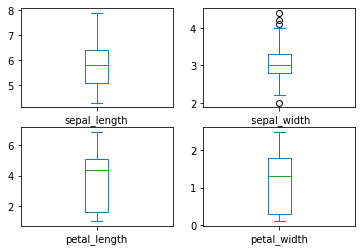

In [9]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Here the histograms, for a similar scope:

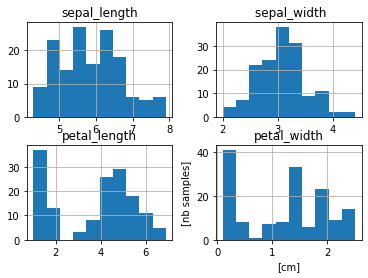

In [10]:
df.hist()
plt.xlabel('[cm]')
plt.ylabel('[nb samples]')
plt.show()

Another possible plot: violin plot.

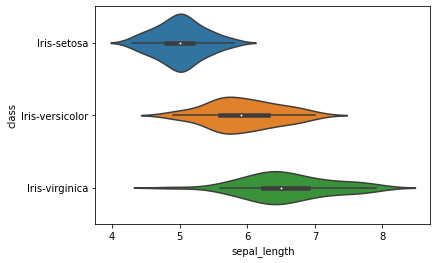

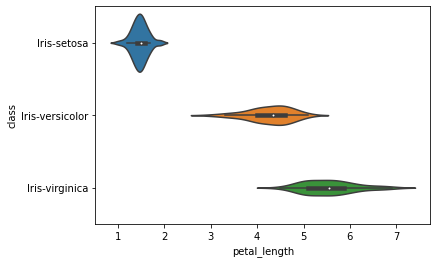

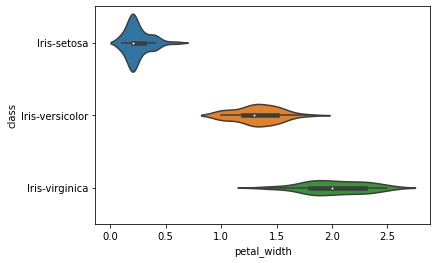

In [11]:
g = sns.violinplot(y='class', x='sepal_length', data=df)
plt.show()
# g = sns.violinplot(y='class', x='sepal_width', data=df)
# plt.show()
g = sns.violinplot(y='class', x='petal_length', data=df)
plt.show()
g = sns.violinplot(y='class', x='petal_width', data=df)

### 2.2.2. Multivariate plots

Visualize the interactions and intercorrelation between variables.

**Scatterplots** of all pairs of attributes can be helpful to spot structured relationships between input variables. Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

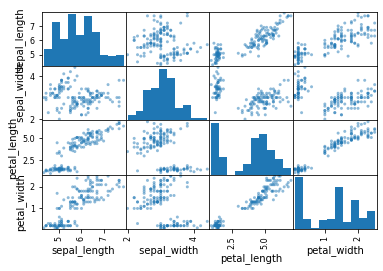

In [14]:
# scatter plot matrix
pd.plotting.scatter_matrix(df)
plt.show()

The plot below is a more visually appealing version of the above snippet, that keeps the histogram layout though, which can be more objective in its simplicity.

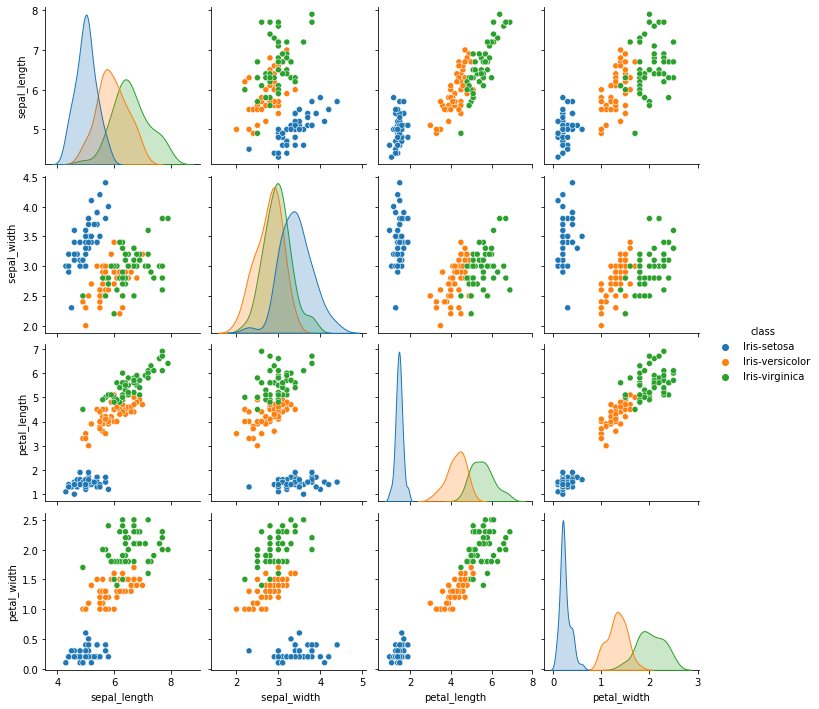

In [15]:
sns.pairplot(df, hue='class');


## 2.3. Heatmap and correlation

Another interesting case of data visualization is use a **heatmap** to visualize the **correlation matrix** of the dataset.

A [**correlation matrix**](https://www.displayr.com/what-is-a-correlation-matrix/) is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The line of 1.00s going from the top left to the bottom right is the main diagonal, which shows that each variable always perfectly correlates with itself.

[**Correlation**](https://en.wikipedia.org/wiki/Correlation): In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data.

The most familiar measure of dependence between two quantities is the [Pearson product-moment correlation coefficient (PPMCC)](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), or "Pearson's correlation coefficient", commonly called simply "the correlation coefficient".

It is obtained by taking the ratio of the covariance of the two variables in question of our numerical dataset, normalized to the square root of their variances. Mathematically, one simply divides the covariance of the two variables by the product of their standard deviations.

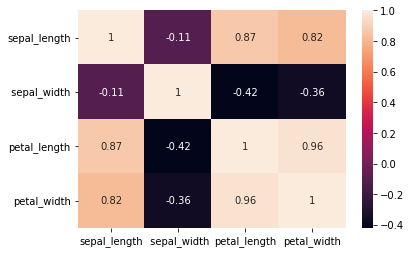

In [16]:
sns.heatmap(df.corr(), annot=True)

# 3. Preprocessing

Frequently, the dataset collected from databases, files or scraping the internet is not ready to be consumed by a machine learning algorithm. In most cases, the dataset needs some kind of preparation or preprocessing before being used as input to a machine learning algorithm. In this case, we convert the string values of the class column to integer numbers because the algorithm we are going to use does not process string values.

Using `class_encod` will be parallel to class, by associating numbers from 0 to 2 to the class names.

In [17]:
df['class_encod'] = df['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
df['class_encod'].unique()


array([0, 1, 2])

Check with exploratory functions:

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_encod
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# 4. The model - algorithms, training and accuracy

## 4.1. Data splitting

The first step is to **split** our dataframe in input attributes and target attributes. The we will split the dataset in training and test data.

Data splitting is a very common method that need to be done in a supervised learning project, as it will allow us to train and test our Machine Learning algorithm with two different datasets, instead of running both in the same dataset.


In [20]:
# Split by separating columns in input and target attributes
y = df[['class_encod']] # target attributes 
X = df.iloc[:, 0:4] # input attributes

# check
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The method `train_test_split()` will split the X and y dataframes in **training data** and **test data**, using use ```scikit-learn``` library's function ```train_test_split```.

`test size` indicates the percentage of the whole data that we will use as the test data. For instance, since we chose 0.3 in this project, therefore, from 150 data, 30% of them or 70 of them will be assigned as label test data and feature test data.
While the rest of the data are treated as train data.

The function assigns data **randomly** to each subset.


In [21]:
# Split the data by rows
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# check
np.shape(y_train)

(105, 1)

In [22]:
y_test[0:10]

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


## 4.2. Algorithms

Let’s test 6 different algorithms:

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

At least two should be compared, as they perform differently and with different datasets.

We will be using the metric of ***accuracy*** to evaluate models.

This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate)

### 4.2.1. K-Nearest Neighbour (KNN)

The [k-nearest neighbors algorithm (*k-NN*)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a non-parametric supervised learning method used for classification and regression.

The **output** depends on whether k-NN is used for classification or regression. For classification, it is a class membership.

Normalization of the dataset and assignment of weights to the neighbours are common optimizations.

The training examples are vectors in a multidimensional feature space, each with a class label. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.

In the classification phase, k is a user-defined constant, and an unlabeled vector (a query or test point) is classified by assigning the label which is most frequent among the k training samples nearest to that query point.

[more about the algorithm...](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#Algorithm)

So, ***k*** is the number of neighbours considered in classification phase. Choice = "parameter tuning".
The best choice of k depends upon the data; generally, larger values of k reduces effect of the noise on the classification, but make boundaries between classes less distinct.

We can try each k value by using for function from 1 to 26 and plot each accuracy by using simple matplotlib line graph.

The KNN algorithm and accuracy calculation are provided by `sklearn` library.

* [`KNeighborsClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) by default has n_neighbors=5 an uniform weights.
* The method `fit()` then creates the model
* Once the model is built, we can use the `predict()` method to calculate the predicted category of an instance. it returns an array with the predicted categories
* We can use methods like `score()` and `confusion_matrix()` to measure the performance of our model. 

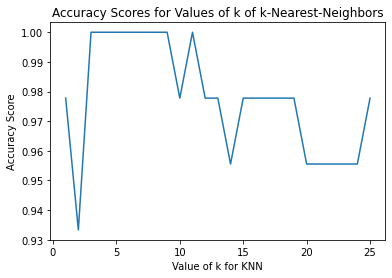

In [26]:
# execute KNN algorithm and calculate the accuracy from metrics function
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, np.ravel(y_train)) # np.ravel() to transform our column-vector into 1d array
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# plot all accuracies in all 26 cases:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

So, the default `k=5` would have been fine.
Compute and save for later use a model `m`, with `k=5`.

Check accuracy: 1.0 `score()` means 100% accuracy, i.e. all test cases were predicted correctly.

In [27]:
m = KNeighborsClassifier() # k=5
m.fit(X_train, np.ravel(y_train))

# predict the class of the first 10 lines of the test dataset (X_test):
m.predict(X_test.iloc[0:10])

# check accuracy:
m.score(X_test, y_test)


1.0

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) (or *error matrix)*, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa.

In [28]:
confusion_matrix(y_test, m.predict(X_test))


array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])

Save for later use: the method `dump()` from the joblib package to save the model to a file.

In [29]:
dump(m, 'iris-classifier.dmp')

ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])

### 4.2.2 Logistics Regression

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(y_train))
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [31]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, np.ravel(y))
knn.predict([[6, 3, 4, 2]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

1 -> iris versicolor

### 4.2.3. Compare all

In [36]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ValueError: ignored